In [30]:
from urllib import request
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
request.urlretrieve("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv","scores.csv")
data=pd.read_csv("scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
X=data['Hours'] #those are just series we need to convert them to dataframes to work with the model
y=data['Scores']
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

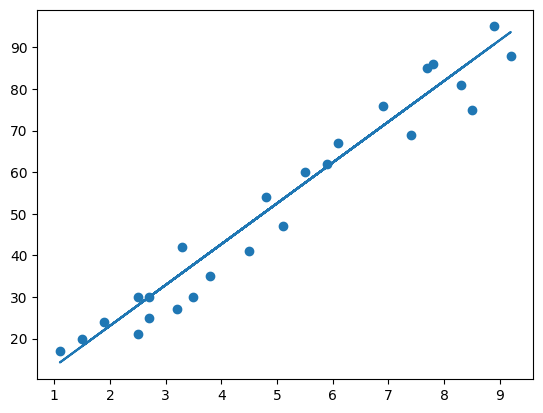

In [39]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [40]:
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 37.53
Mean Absolute Error (MAE): 5.93
R-squared (R2): 0.94


In [41]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

    Hours
19    7.4
24    7.8
6     9.2
21    4.8
22    3.8
2     3.2
4     3.5
8     8.3


In [46]:

# Assuming y_test and y_pred are NumPy arrays or Pandas Series
y_test_values = y_test.values.flatten()
y_pred_values = y_pred.flatten()

df = pd.DataFrame({'Actual': y_test_values, 'Predicted': y_pred_values})
print(df)


   Actual  Predicted
0      69  76.023836
1      86  79.944703
2      88  93.667740
3      54  50.538196
4      35  40.736027
5      27  34.854725
6      30  37.795376
7      81  84.845788


In [49]:


# Assuming model is your trained linear regression model
hours = 9.25
x = pd.DataFrame([hours])  # Convert to DataFrame and reshape
own_pred = model.predict(x.values.reshape(-1, 1))

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = [94.15784881]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:

# Assuming x is a single value entered by the user
x = float(input("Enter the number of hours: "))
x_df = pd.DataFrame([x])  # Convert to DataFrame and reshape
y_pred = model.predict(x_df.values.reshape(-1, 1))

print("Predicted y:", y_pred)


Enter the number of hours: 2.5
Predicted y: [[27.99320652]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
